<a href="https://colab.research.google.com/github/trxmaschine/homewrks/blob/lvl-2/Home_works_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

### Считывание датасета

In [6]:
df = pd.read_excel('Реестр_выполненных_рейсов_за_период.xlsx', header=1).drop(columns=['Unnamed: 0', 'В/П', 'Время рейса план','Actual data time','ONB and OFB','Кл.1','Кл.2','Кл.3','Unnamed: 15','Unnamed: 13'])
df.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,№ рейса,Код АП,Маршрут,Борт,Компоновка,Вместимость,Обслужено пассажиров,Взр,Дети,До 2-лет,"МВМ, тонн",Тип ВС,АВК,Направление,Катег,Baggage Weight,Spot Number
0,DP 204,VKO,ВНУКОВО,RA73232,Y189,189.0,115.0,107.0,8.0,0.0,75.296,73H,1.0,Domestic,J,143.0,106A
1,FZ 992,DXB,ДУБАЙ,A6FMJ,174,166.0,132.0,115.0,17.0,1.0,82.190,7M8,1.0,International,J,1396.0,104B
2,2S 204,AYT,АНТАЛЬЯ,TCGRA,Y345,312.0,342.0,288.0,54.0,0.0,233.000,332,1.0,International,J,3881.0,105
3,JU 124,BEG,БЕЛГРАД,YUAPN,12J126Y,144.0,66.0,57.0,9.0,0.0,70.000,319,1.0,International,J,1159.0,104B
4,SU 734,SSH,ШАРМ-ЭЛЬ-ШЕЙХ,73785,C28Y268,296.0,283.0,248.0,35.0,2.0,230.000,333,1.0,International,J,3243.0,103


### Основная информация о датасете:

In [7]:
df.describe()

,Вместимость,Обслужено пассажиров,Взр,Дети,До 2-лет,"МВМ, тонн",АВК,Baggage Weight
count,11268.000000,1.126700e+04,1.126900e+04,11269.000000,11269.000000,11269.000000,11268.0,11243.000000
mean,147.469027,2.539123e+02,2.398177e+02,13.873281,1.851273,142.676610,1.0,745.221382
std,56.719575,1.347482e+04,1.272796e+04,736.331751,98.262639,7572.382994,0.0,792.998891
min,19.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,17.200000,1.0,-690.000000
25%,93.000000,8.400000e+01,8.000000e+01,2.000000,0.000000,45.880000,1.0,295.000000
50%,148.000000,1.230000e+02,1.170000e+02,5.000000,0.000000,73.500000,1.0,492.000000
75%,189.000000,1.710000e+02,1.610000e+02,9.000000,1.000000,77.337000,1.0,844.000000
max,457.000000,1.430415e+06,1.351253e+06,78169.000000,10431.000000,803911.357000,1.0,11106.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11271 entries, 0 to 11270
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   № рейса               11269 non-null  object 
 1   Код АП                11268 non-null  object 
 2   Маршрут               11242 non-null  object 
 3   Борт                  11268 non-null  object 
 4   Компоновка            11252 non-null  object 
 5   Вместимость           11268 non-null  float64
 6   Обслужено пассажиров  11267 non-null  float64
 7   Взр                   11269 non-null  float64
 8   Дети                  11269 non-null  float64
 9   До 2-лет              11269 non-null  float64
 10  МВМ, тонн             11269 non-null  float64
 11  Тип ВС                11268 non-null  object 
 12  АВК                   11268 non-null  float64
 13  Направление           11268 non-null  object 
 14  Катег                 11268 non-null  object 
 15  Baggage Weight     

In [9]:
df.isna().sum()

,0
№ рейса,2
Код АП,3
Маршрут,29
Борт,3
Компоновка,19
Вместимость,3
Обслужено пассажиров,4
Взр,2
Дети,2
До 2-лет,2


#### Удалим NaN из столбца Код АП и создадим копию таблицы:

In [10]:
df1 = df.dropna(subset='Код АП').copy()
df1[df1.isna().any(axis=1)]

,№ рейса,Код АП,Маршрут,Борт,Компоновка,Вместимость,Обслужено пассажиров,Взр,Дети,До 2-лет,"МВМ, тонн",Тип ВС,АВК,Направление,Катег,Baggage Weight,Spot Number
464,7R 292,TBW,NaN,RA67146,50,50.0,33.0,33.0,0.0,0.0,24.040,CR1,1.0,Domestic,J,80.0,142
488,7R 291,TBW,NaN,RA67146,Y50,50.0,41.0,37.0,4.0,0.0,24.040,CR1,1.0,Domestic,J,128.0,142
816,7R 291,TBW,NaN,RA67151,Y50,50.0,39.0,34.0,5.0,0.0,24.040,CR1,1.0,Domestic,J,77.0,131
906,7R 292,TBW,NaN,RA67151,50,50.0,42.0,38.0,4.0,0.0,24.040,CR1,1.0,Domestic,J,118.0,142
1892,DP 587,KGD,КАЛИНИНГРАД,RA73235,Y189,189.0,184.0,170.0,14.0,1.0,75.296,73H,1.0,Domestic,J,NaN,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10665,FV 6323,LED,ПУЛКОВО,RA89043,NaN,87.0,96.0,96.0,0.0,0.0,45.880,SU9,1.0,Domestic,J,465.0,706
10717,7R 292,TBW,NaN,RA67151,50,50.0,45.0,44.0,1.0,1.0,24.040,CR1,1.0,Domestic,J,207.0,135
10995,7R 291,TBW,NaN,RA67151,50,50.0,42.0,41.0,1.0,0.0,24.040,CR1,1.0,Domestic,J,118.0,135
11052,VGV9576,VGD,ВОЛОГДА,87966,NaN,30.0,4.0,4.0,0.0,0.0,17.200,YK4,1.0,Domestic,C,0.0,142


### % Выполненных рейсов по каждому из АП, ТОП 10 АП

In [11]:
df1['Код АП'].value_counts(normalize=True,ascending=False).head(10)

,proportion
Код АП,
SVO,0.151136
VKO,0.093007
KGD,0.059283
AER,0.038516
KZN,0.032481
MMK,0.029020
SVX,0.027867
ARH,0.027778
KUF,0.024050


### % Выполненных рейсов по Направлению Domestic

In [12]:
df2 = df1[df1['Направление'] == 'Domestic'] # фильтруем направление, дублируем таблицу
df2.head(10)

,№ рейса,Код АП,Маршрут,Борт,Компоновка,Вместимость,Обслужено пассажиров,Взр,Дети,До 2-лет,"МВМ, тонн",Тип ВС,АВК,Направление,Катег,Baggage Weight,Spot Number
0,DP 204,VKO,ВНУКОВО,RA73232,Y189,189.0,115.0,107.0,8.0,0.0,75.296,73H,1.0,Domestic,J,143.0,106A
5,DP 572,KUF,САМАРА,RA73305,Y189,189.0,180.0,169.0,11.0,3.0,75.296,73H,1.0,Domestic,J,245.0,106A
7,FV 6699,SVO,ШЕРЕМЕТЬЕВО,RA89104,C12Y75,87.0,78.0,75.0,3.0,1.0,45.880,SU9,1.0,Domestic,S,238.0,146A
8,N4 318,KEJ,КЕМЕРОВО,RA73313,189,189.0,139.0,122.0,17.0,0.0,79.000,73H,1.0,Domestic,J,432.0,104B
9,FV 6559,AER,СОЧИ,RA73215,C8Y120,128.0,122.0,113.0,9.0,1.0,70.000,319,1.0,Domestic,J,918.0,104A
10,WZ 709,KLF,КАЛУГА,RA89192,Y100,100.0,91.0,89.0,2.0,2.0,49.450,SU9,1.0,Domestic,J,355.0,146B
12,U6 547,AER,СОЧИ,RA73802,Y236,236.0,230.0,209.0,21.0,1.0,93.500,32Q,1.0,Domestic,J,881.0,709
13,FV 6039,SVO,ШЕРЕМЕТЬЕВО,RA89041,C12Y75,87.0,63.0,58.0,5.0,0.0,45.880,SU9,1.0,Domestic,S,163.0,109A
14,DP 1515,SVX,ЕКАТЕРИНБУРГ,RA73305,Y189,189.0,188.0,173.0,15.0,2.0,75.296,73H,1.0,Domestic,J,323.0,106A
15,D2 323,UCT,УХТА,RA89135,C8Y85,93.0,45.0,40.0,5.0,1.0,45.880,S9S,1.0,Domestic,J,315.0,135


####ТОП 10 АП по Domestic

In [13]:
df2['Код АП'].value_counts(normalize=True,ascending=False).head(10)

,proportion
Код АП,
SVO,0.181750
VKO,0.111846
KGD,0.071291
AER,0.046318
KZN,0.039061
MMK,0.034899
SVX,0.033511
ARH,0.033404
KUF,0.028922


### Самые популярные аэропорты в Domestic зоне(ТОП 2)

In [14]:
import matplotlib.pyplot as plt

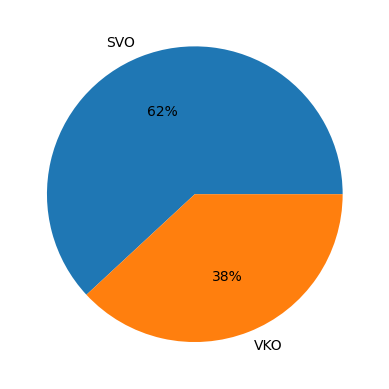

In [15]:
data = df2['Код АП'].value_counts(normalize=True).head(2)

fig, ax = plt.subplots()
ax.pie(data, labels=data.index, autopct='%1.f%%');

In [16]:
df2['Код АП'].value_counts(normalize=True,ascending=False).head(1) #ТОП 1 без визуализации

,proportion
Код АП,
SVO,0.18175


### Самые популярные аэропорты в International зоне(ТОП 2)

In [17]:
df3 = df1[df1['Направление'] == 'International'] # фильтруем направление, дублируем таблицу


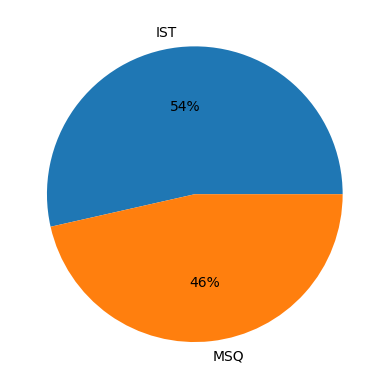

In [18]:
data = df3['Код АП'].value_counts(normalize=True).head(2)

fig, ax = plt.subplots()
ax.pie(data, labels=data.index, autopct='%1.f%%');

In [19]:
df3['Код АП'].value_counts(normalize=True,ascending=False).head(1) #ТОП 1 без визуализации

,proportion
Код АП,
IST,0.111697


### Часть таблицы и рейсы с катег "С" в Салехард

In [32]:
df4 = df1[(df1['Катег'] == 'C') & (df1['Маршрут'] == 'САЛЕХАРД')]
df4.head()

,№ рейса,Код АП,Маршрут,Борт,Компоновка,Вместимость,Обслужено пассажиров,Взр,Дети,До 2-лет,"МВМ, тонн",Тип ВС,АВК,Направление,Катег,Baggage Weight,Spot Number
8941,YC 9715,SLY,САЛЕХАРД,67219,14,19.0,6.0,6.0,0.0,0.0,24.04,CR2,1.0,Domestic,C,40.0,262
9511,YC 9716,SLY,САЛЕХАРД,RA67219,C14,19.0,5.0,5.0,0.0,0.0,24.04,CR2,1.0,Domestic,C,180.0,262


In [33]:
df4.sort_values(by=['Baggage Weight'], ascending=[False])

,№ рейса,Код АП,Маршрут,Борт,Компоновка,Вместимость,Обслужено пассажиров,Взр,Дети,До 2-лет,"МВМ, тонн",Тип ВС,АВК,Направление,Катег,Baggage Weight,Spot Number
9511,YC 9716,SLY,САЛЕХАРД,RA67219,C14,19.0,5.0,5.0,0.0,0.0,24.04,CR2,1.0,Domestic,C,180.0,262
8941,YC 9715,SLY,САЛЕХАРД,67219,14,19.0,6.0,6.0,0.0,0.0,24.04,CR2,1.0,Domestic,C,40.0,262


### Средняя МВМ, вместимость с груп. по направлению


#### По вместимости

In [55]:
df.groupby(["Направление","Тип ВС"])["Вместимость"].mean()

Направление    Тип ВС
Domestic       319       128.208817
               320       158.302013
               321       215.638298
               32A       151.274538
               32B       189.848485
               32N       176.170732
               32Q       237.549708
               332       361.476190
               333       298.692308
               735       126.000000
               73G       140.000000
               73H       188.229361
               73W       148.000000
               77W       420.333333
               789       290.000000
               A26        40.000000
               CR1        50.000000
               CR2        49.500000
               E90       110.000000
               S9S        93.000000
               SU9        90.282105
               YK4        30.000000
International  319       132.700565
               320       159.610619
               321       190.000000
               32A       148.000000
               32B       214.000000
               32N       181.947368
               32Q       223.879828
               332       287.278689
               333       302.725664
               733       148.000000
               735       123.000000
               739       184.000000
               73H       174.542510
               73W       120.000000
               752       238.000000
               763       313.750000
               772       429.500000
               77W       354.000000
               789       290.000000
               7M8       166.848485
               E75        76.000000
               E95       107.000000
               SU9       100.000000
Name: Вместимость, dtype: float64

#### ПО МВМ

In [56]:
df.groupby(["Направление","Тип ВС"])["МВМ, тонн"].mean()

Направление    Тип ВС
Domestic       319        70.077146
               320        76.406040
               321        89.170213
               32A        75.500000
               32B        91.113636
               32N        75.213415
               32Q        93.520468
               332       233.000000
               333       233.365385
               735        56.850000
               73G        70.080000
               73H        76.871667
               73W        67.269776
               77W       325.074000
               789       250.836000
               A26        24.000000
               CR1        24.040000
               CR2        24.034194
               E90        50.300000
               S9S        45.880000
               SU9        46.103326
               YK4        17.200000
International  319        69.751412
               320        76.225664
               321        89.000000
               32A        75.184211
               32B        89.533333
               32N        76.964912
               32Q        93.510730
               332       234.245902
               333       233.238938
               733        63.134000
               735        56.233333
               739        85.139000
               73H        78.344777
               73W        69.512500
               752       115.892000
               763       186.313000
               772       289.448500
               77W       351.030000
               789       243.900960
               7M8        82.190000
               E75        38.790000
               E95        50.790000
               SU9        49.450000
Name: МВМ, тонн, dtype: float64